<a href="https://colab.research.google.com/github/LF7-AI/Coding-for-Computational-Biologist/blob/main/Predicting_Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Clone the repo
!git clone https://github.com/dphi-official/Datasets.git
%cd Datasets

Cloning into 'Datasets'...
remote: Enumerating objects: 10246, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 10246 (delta 28), reused 94 (delta 25), pack-reused 10147 (from 1)
Receiving objects: 100% (10246/10246), 557.44 MiB | 18.04 MiB/s, done.
Resolving deltas: 100% (218/218), done.
Updating files: 100% (9441/9441), done.
/content/Datasets


In [ ]:
!pip install biopython pandas matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.6 MB/s eta 0:00:00


In [ ]:
# List all the files and folders in the current directory
!ls

 abalone_data
'airbnb _data'
 airbnb_listings.csv
 air.csv
'Amazon Top 50 Bestselling Books 2009 - 2019.csv'
 animal_data
 auction_data
 audit_data
 avocado.csv
 bank_marketing_data
 bank_note_data
 B-cell_Epitope
 Bengaluru_House_Data.csv
 bike_data
 bird-window-collision-death.csv
 Boston_Housing
 breast_cancer
'breast_cancer_data (1).csv'
 canada_income.csv
 cancer_death_rate
 car_evaluation_data
 cascadecup
 Caste.csv
 cats_dogs_dataset
 CCPP
 Census_Income
 Chicago_Crime_Detective.csv
'Chronic Kidney Disease (CKD) Dataset'
 cifar_image_flattened_pixels.csv
 clamp
 communities_and_crimes
 concrete_data
 connect-4
 covid_19_data.csv
 credit_risk
 crop_recommendation
 cyberbullying_data
'DPhi - Learners - Beginners & Absolute Beginners - Real Dataset - DPhi_Learners.csv'
 electronic_product
 ele_prod_h
 eng_grad_emp_salary
 exam_scores.csv
 face_mask_data
 fb_live_sellers.csv
 female_labour_cleaned.csv
 framingham.csv
 fraud_data.csv
 fruit_data.csv
 Heart_Disease
 heart_disease.csv


In [ ]:
import pandas as pd
# Load training and testing set
train_file= "/content/Datasets/Heart_Disease/Training_set_heart.csv"
test_file = "/content/Datasets/Heart_Disease/Testing_set_heart.csv"
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [ ]:
#Basic info
print(train_df.info())
print(test_df.info)
# Checking for missing values
print(train_df.isnull().sum())
#Description stats
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB
None
<bound method DataFrame.info of     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    46    0   0       138   243    0        0      152      1      0.0   
1    45    0   0       138   236

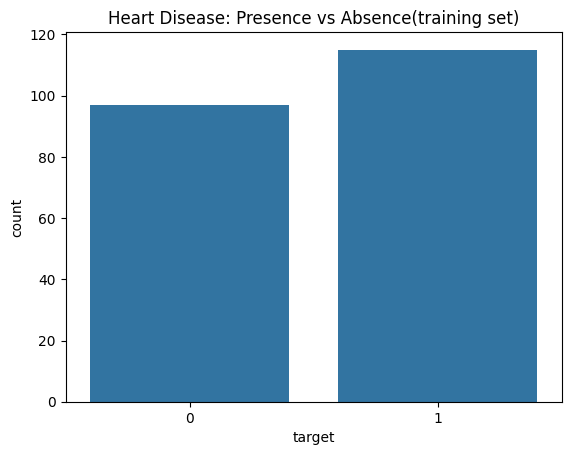

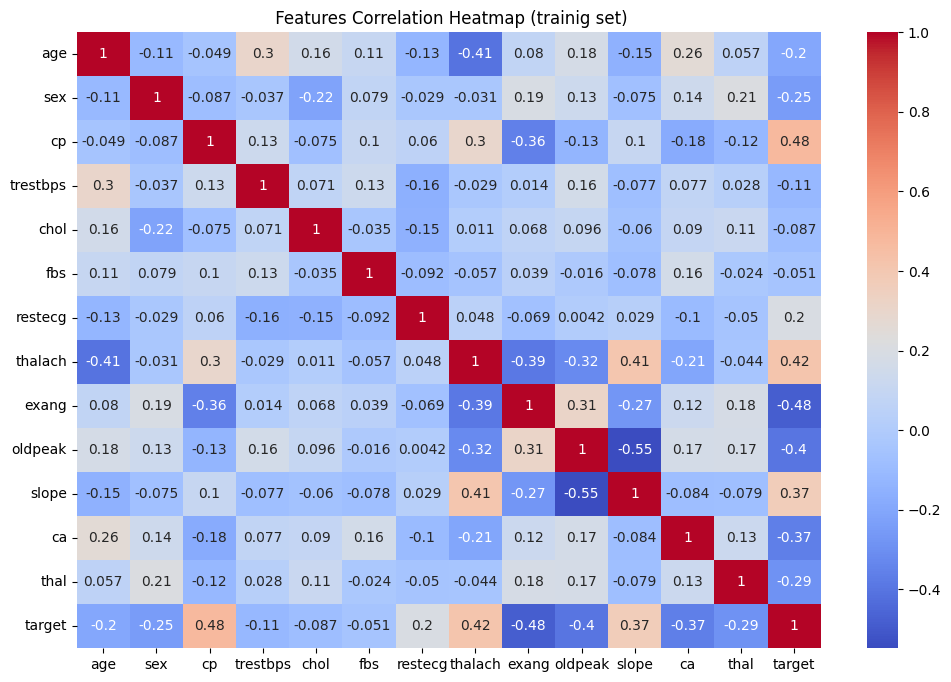

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of target variable
sns.countplot(x='target', data=train_df)
plt.title("Heart Disease: Presence vs Absence(training set)")
plt.show()

#Correation Heatmap
plt.figure(figsize= (12,8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title(" Features Correlation Heatmap (trainig set)")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
#Features and target
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']

#Initialize and train model using scaled data
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(train_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
print(test_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [ ]:
#predict heart disease on test set
X_test = test_df.drop('target', errors= 'ignore')
y_pred = model.predict(X_test)

#Add predicitons to test set
test_df['predicted_target'] = y_pred
display(test_df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted_target
0,46,0,0,138,243,0,0,152,1,0.0,1,0,2,0
1,45,0,0,138,236,0,0,152,1,0.2,1,0,2,0
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2,1
3,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
4,47,1,2,108,243,0,1,152,0,0.0,2,0,2,1


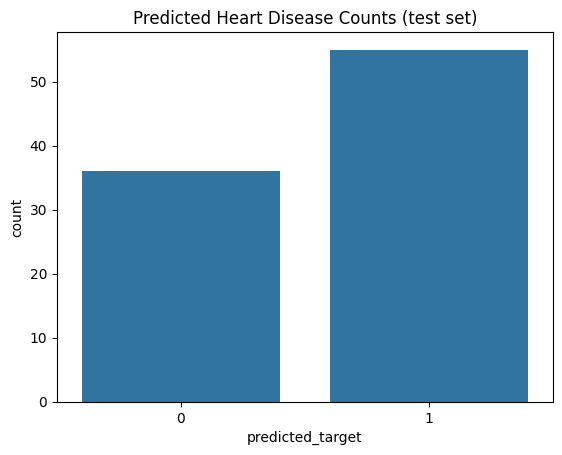

In [ ]:
#Count of predicted heart disease cases
sns.countplot(x='predicted_target', data=test_df)
plt.title("Predicted Heart Disease Counts (test set)")
plt.show()